<a href="https://colab.research.google.com/github/hk-567/Fractal-Visualisation/blob/main/fractals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)  # NumPy will detect overflows from the numbers squaring
                                     # and adding numbers unconditionally, this stops from the warning before calling the function.

In [34]:
import ipywidgets as widgets
from ipywidgets import interactive

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
xmin_slider = widgets.FloatSlider(value=-2.0, min=-3.0, max=3.0, step=0.1, description='X-min:')
xmax_slider = widgets.FloatSlider(value=1.0, min=-3.0, max=3.0, step=0.1, description='X-max:')
ymin_slider = widgets.FloatSlider(value=-1.5, min=-3.0, max=3.0, step=0.1, description='Y-min:')
ymax_slider = widgets.FloatSlider(value=1.5, min=-3.0, max=3.0, step=0.1, description='Y-max:')


In [37]:
def update_mandelbrot(xmin, xmax, ymin, ymax):
    c = complex_matrix(xmin, xmax, ymin, ymax, pixel_density=21)
    members = get_members(c, num_iterations=20)
    plt.scatter(members.real, members.imag, color="black", marker=",", s=1)
    plt.gca().set_aspect("equal")
    plt.axis("off")
    plt.tight_layout()
    plt.show()


In [38]:
interactive_plot = interactive(update_mandelbrot, xmin=xmin_slider, xmax=xmax_slider, ymin=ymin_slider, ymax=ymax_slider)


In [39]:
display(interactive_plot)


interactive(children=(FloatSlider(value=-2.0, description='X-min:', max=3.0, min=-3.0), FloatSlider(value=1.0,…

In [40]:

def complex_matrix(xmin, xmax, ymin, ymax, pixel_density):
# pixel_density - desired number of pixels per unit
    re = np.linspace(xmin, xmax, int((xmax - xmin) * pixel_density))
    # np.linspace() creates even spaced numbers in a given range (xmin -xmax)
    im = np.linspace(ymin, ymax, int((ymax - ymin) * pixel_density))
    return re[np.newaxis, :] + im[:, np.newaxis] * 1j
    # this returns a 2D array of complex numbers enclosed in a rectangular area

In [41]:
def is_stable(c, num_iterations):
    z = 0
    for _ in range(num_iterations):
        z = z ** 2 + c # this ges excecuted for all elements of matric c on each iteration
    return abs(z) <= 2
    # this recursive formula sees which number remain stable or not and due to Numpy, the matrix can be passed as a single parameter

In [42]:
def get_members(c, num_iterations):
    mask = is_stable(c, num_iterations)
    return c[mask] # the boolean mask of stability into the initial complex numbers
    # returns a 1D array comprised of the stable complex numbers belonging to the mandelbrot set

<ipython-input-41-575bab8fce84>:4: RuntimeWarning: overflow encountered in square
  z = z ** 2 + c # this ges excecuted for all elements of matric c on each iteration
<ipython-input-41-575bab8fce84>:4: RuntimeWarning: invalid value encountered in square
  z = z ** 2 + c # this ges excecuted for all elements of matric c on each iteration


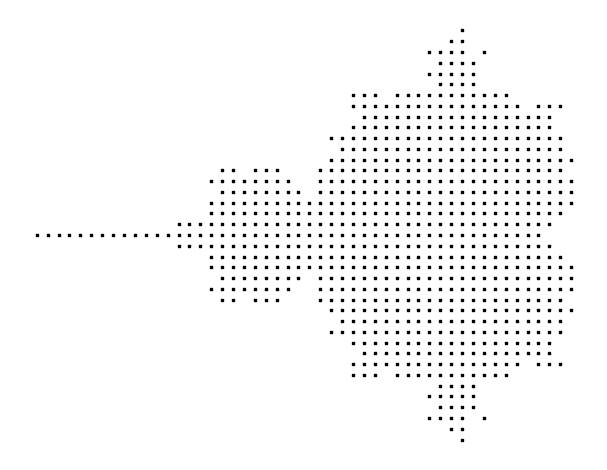

In [43]:
c = complex_matrix(-2, 0.5, -1.5, 1.5, pixel_density=21)
members = get_members(c, num_iterations=20)
# get members only passes through only the numbers within the set

plt.scatter(members.real, members.imag, color="black", marker=",", s=1)
# plots the set
plt.gca().set_aspect("equal")
plt.axis("off")
plt.tight_layout()
plt.show()
# reveals picture
# used matplotlib to show a scatter plot


<ipython-input-41-575bab8fce84>:4: RuntimeWarning: overflow encountered in square
  z = z ** 2 + c # this ges excecuted for all elements of matric c on each iteration
<ipython-input-41-575bab8fce84>:4: RuntimeWarning: invalid value encountered in square
  z = z ** 2 + c # this ges excecuted for all elements of matric c on each iteration


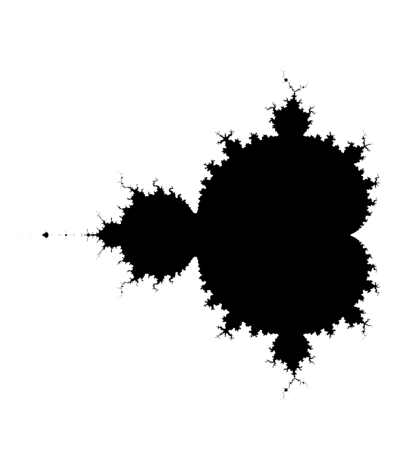

In [44]:
#high resoloution option
# using a binary colormap and bumping up the pixel density
c = complex_matrix(-2, 0.5, -1.5, 1.5, pixel_density=512)
plt.imshow(is_stable(c, num_iterations=20), cmap="binary")
plt.gca().set_aspect("equal")
plt.axis("off")
plt.tight_layout()
plt.show()

In [45]:
# Define the function to generate the Julia set
def generate_julia_set(c, width, height, max_iter):
    julia_set = np.zeros((width, height))
    x_min, x_max = -2, 2
    y_min, y_max = -2, 2
    real, imag = np.linspace(x_min, x_max, width), np.linspace(y_min, y_max, height)
    complex_plane = np.array(np.meshgrid(real, imag)).T.reshape(-1, 2)

    for i in range(width * height):
        z = complex_plane[i, 0] + complex_plane[i, 1] * 1j
        n = 0
        while abs(z) <= 2 and n < max_iter:
            z = z * z + c
            n += 1
        julia_set[i // width, i % width] = n

    return julia_set


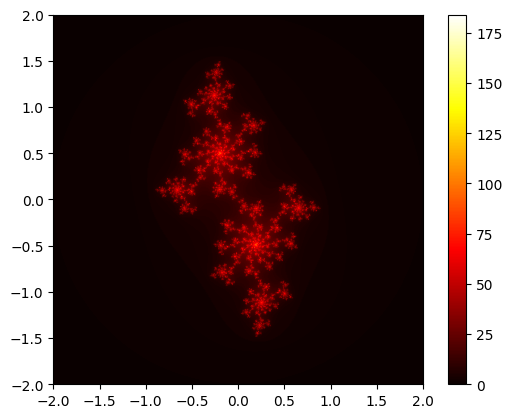

In [46]:
# Define the complex number for the Julia set
c = complex(-0.70176, -0.3842)

# Define the width, height, and maximum iterations
width, height = 800, 800
max_iter = 256

# Generate the Julia set
julia_set = generate_julia_set(c, width, height, max_iter)

# Display the Julia set
plt.imshow(julia_set, extent=(-2, 2, -2, 2), cmap='hot')
plt.colorbar()
plt.show()


In [47]:
# Define the function to generate the Burning Ship fractal
def generate_burning_ship(width, height, max_iter):
    burning_ship = np.zeros((width, height))
    x_min, x_max = -2, 1
    y_min, y_max = -2, 2
    real, imag = np.linspace(x_min, x_max, width), np.linspace(y_min, y_max, height)
    complex_plane = np.array(np.meshgrid(real, imag)).T.reshape(-1, 2)

    for i in range(width * height):
        z = 0
        c = complex_plane[i, 0] + complex_plane[i, 1] * 1j
        n = 0
        while abs(z) <= 2 and n < max_iter:
            z = abs(z.real) + abs(z.imag) * 1j + c
            n += 1
        burning_ship[i // width, i % width] = n

    return burning_ship


In [ ]:
# Define the dimensions and maximum iterations
width, height = 800, 800
max_iter = 256

# Generate the Burning Ship fractal
burning_ship = generate_burning_ship(width, height, max_iter)

# Display the Burning Ship fractal
plt.imshow(burning_ship, extent=(-2, 1, -2, 2), cmap='hot')
plt.colorbar()
plt.show()
